We compared the Diaper Awareness Week Campaign Data Set with the “All Accounts Without Transaction” data set and “Active Recurring Donations Dataset”

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.style.use('seaborn-v0_8-paper')

In [51]:
week_opens = pd.read_csv("diaper_awareness_week_email_metrics_2020-20241116T215646Z-001\diaper_awareness_week_email_metrics_2020\diaper_need_awareness_week_opens.csv", parse_dates=['Last Open'], index_col=['Account ID'])

In [52]:
week_opens

,Email,Name,Opens,Last Open,Unnamed: 5
Account ID,,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23,NaN
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23,NaN
104,Shrrodgers@yahoo.com,Sharon Rodgers,2,2020-09-23,NaN
106,troy@vosseller.com,Troy Vosseller,1,2020-09-23,NaN
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24,NaN
...,...,...,...,...,...
46,becca@jssmadison.org,Rebecca Schwartz,23,2020-10-08,NaN
51,bsollenb@gmail.com,Brad Sollenberger,1,2020-09-23,NaN
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27,NaN


In [53]:
week_opens.columns

Index(['Email', 'Name', 'Opens', 'Last Open', 'Unnamed: 5'], dtype='object')

In [54]:
week_opens.drop(['Unnamed: 5'], axis = 1, inplace = True) # Drops the given column

In [55]:
week_opens.dtypes # Checks data type of each column

Email                object
Name                 object
Opens                 int64
Last Open    datetime64[ns]
dtype: object

In [56]:
week_opens.columns[week_opens.isna().any()].tolist() # Checks for columns with NaN

[]

In [57]:
week_opens.sort_values(by='Opens', ascending=False) # Sorts the data sets based on highest Open rates


,Email,Name,Opens,Last Open
Account ID,,,,
318,aenymann@outlook.com,Ann Nymann,31,2020-10-08
46,becca@jssmadison.org,Rebecca Schwartz,23,2020-10-08
15,jzboll@hotmail.com,Joan Boll,15,2020-09-23
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24
...,...,...,...,...
378,wkkwagner@gmail.com,KIMBERLY WAGNER,1,2020-09-23
382,v.hokanson@gmail.com,Vicki Hokanson,1,2020-09-23
386,waunakeevet@tds.net,Karen Lange,1,2020-09-23


In [58]:
week_opens['Opens'].describe()

count    116.000000
mean       2.396552
std        4.049432
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000
Name: Opens, dtype: float64

Daiper Awareness Week Metrics

count    116.000000
mean       2.396552
std        4.049432
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000

In [59]:
week_opens["Email"].value_counts(dropna=False)

Email
seth@kilterrewards.com         1
ashleylocke24@gmail.com        1
Shrrodgers@yahoo.com           1
troy@vosseller.com             1
jettlie888@yahoo.com           1
                              ..
becca@jssmadison.org           1
bsollenb@gmail.com             1
lseidl-gafner@reachdane.org    1
brickdeeproots@gmail.com       1
kulaky@gmail.com               1
Name: count, Length: 116, dtype: int64

In [60]:
week_opens['Last Open'] = week_opens['Last Open'].dt.date # Removes the Hours, minutes, and seconds for column with dates


In [61]:
last_open = week_opens.groupby(week_opens['Last Open'])['Opens'].sum() # Counts the open rates for each date

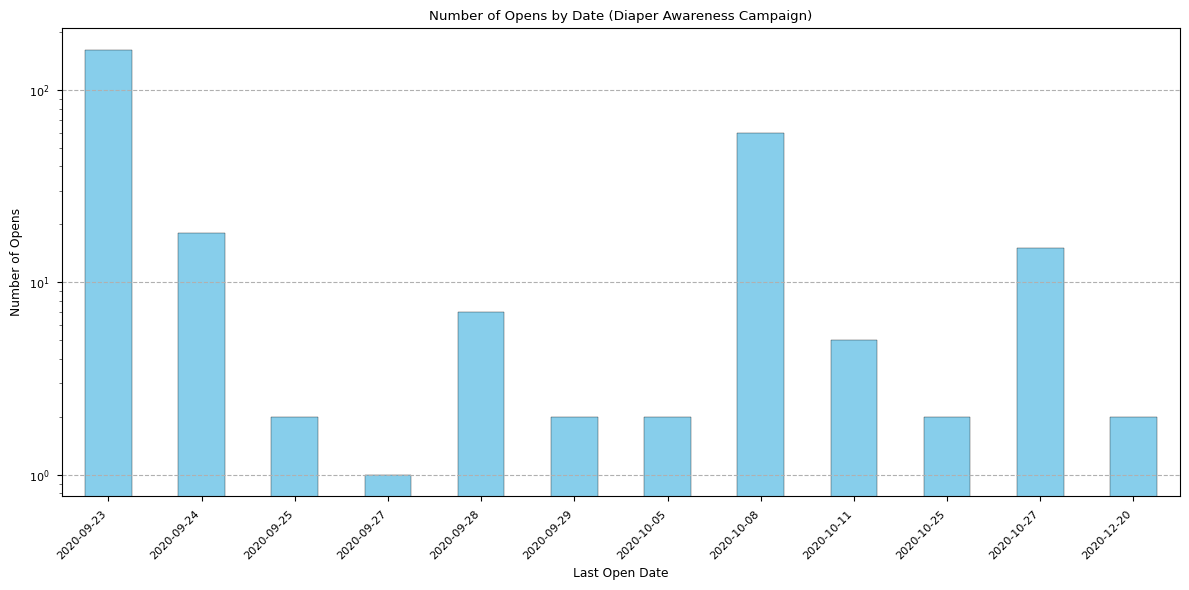

In [62]:
plt.figure(figsize=(12, 6))
last_open.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Opens by Date (Diaper Awareness Campaign)')
plt.xlabel('Last Open Date')
plt.ylabel('Number of Opens')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--')  # Optional: add a grid for better readability
plt.show()


In [ ]:
week_opens.to_csv('CleanedDonorDataSets/Week_Email_Metrics_Cleaned.csv', index = True)

In [64]:
no_transaction = pd.read_csv("DonorDataSets/all_account_without_transactions .csv", index_col=['Account ID'])

In [65]:
no_transaction.columns

Index(['Account Type', 'Full Name (F)', 'Company Name',
       'Full Street Address (F)', 'City', 'State/Province', 'Email 1',
       'All Donation Amount', 'All Order Amount', 'All Registration Amount',
       'Unnamed: 11'],
      dtype='object')

In [66]:
no_transaction.drop(['Unnamed: 11'], axis = 1, inplace=True)


In [67]:
no_transaction.columns[no_transaction.isna().any()].tolist()

['Full Name (F)',
 'Company Name',
 'Full Street Address (F)',
 'City',
 'State/Province',
 'Email 1']

In [ ]:
no_transaction.isna().sum()

Account Type                0
Full Name (F)               1
Company Name               38
Full Street Address (F)    12
City                       12
State/Province             12
Email 1                     3
All Donation Amount         0
All Order Amount            0
All Registration Amount     0
dtype: int64

In [69]:
# Reset the index to treat Account ID as a column
df1_reset = week_opens.reset_index()
df2_reset = no_transaction.reset_index()

clicks_but_no_transaction = df1_reset[(df1_reset['Name'].isin(df2_reset['Full Name (F)']))]
clicks_but_no_transaction.set_index('Account ID')

print("Accounts in the Diaper Awareness Campaign who Opened the Links but haven't made Transaction")
clicks_but_no_transaction

Accounts in the Diaper Awareness Campaign who Opened the Links but haven't made Transaction


,Account ID,Email,Name,Opens,Last Open
6,111,Limeandnavy@gmail.com,Abby Ehringer,1,2020-09-23
17,140,Katielim16@gmail.com,Katie Lim,2,2020-09-24
19,146,natalieaz9@gmail.com,Natalie Meyer,1,2020-09-23
21,151,amyg123@gmail.com,Amy Bass,1,2020-09-23
22,152,gamine417@hotmail.com,Lisa Williams,3,2020-09-24
23,161,badgergirl712@uwalumni.com,Kristen Vale,1,2020-09-23
24,164,candyralston@sbcglobal.net,Candy Pangan,1,2020-09-23
25,166,claire.tomm@gmail.com,Claire Tomm,1,2020-09-23
26,168,roxglick@gmail.com,Roxanne Glick,2,2020-09-23
51,250,emensamie@gmail.com,Amie Conley,1,2020-09-23


Of the 116 people targeted by the diaper Awareness Campaign, 16 individuals have made no transactions at all when comparing with the “All Accounts Without Transaction” data set. These are the 16 users who got the links and even opened the links but haven’t made any transactions according to the ““All Accounts Without Transaction” data set.

In [70]:
clicks_but_no_transaction['Name'].size # checks number of individuals in the given column

16

In [71]:
week_opens['Name'].size

116

In [72]:
clicks_but_no_transaction['Opens'].describe()

count    16.000000
mean      2.750000
std       5.446712
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      23.000000
Name: Opens, dtype: float64

Clicks But No Donation

count    16.000000
mean      2.750000
std       5.446712
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      23.000000


In [73]:
clicks_with_transaction = df1_reset[~(df1_reset['Name'].isin(df2_reset['Full Name (F)']))]
clicks_with_transaction.set_index('Account ID', inplace=True)

In [74]:
print('Clicks With Transaction')
clicks_with_transaction.sort_values(by= 'Opens', ascending=False)

Clicks With Transaction


,Email,Name,Opens,Last Open
Account ID,,,,
318,aenymann@outlook.com,Ann Nymann,31,2020-10-08
15,jzboll@hotmail.com,Joan Boll,15,2020-09-23
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24
345,gandkcherry@outlook.com,Kathy Cherry,8,2020-09-23
...,...,...,...,...
381,breunigkasey@gmail.com,Kasey Breunig,1,2020-10-05
386,waunakeevet@tds.net,Karen Lange,1,2020-09-23
382,v.hokanson@gmail.com,Vicki Hokanson,1,2020-09-23



100 of the remaining individuals have made some form of donation before; however, we can not conclude the causality from this to establish the effectiveness of the diaper awareness campaign. For that, we were hoping to tally the date when the link was last clicked and compare that date  with the All Donors data set; however, the all donor data set has no timestamp; so there is no way of knowing if these 100 donors were affected by the diaper awareness campaign.

In [75]:
clicks_with_transaction['Name'].size

100

In [76]:
clicks_with_transaction['Opens'].describe()

count    100.000000
mean       2.340000
std        3.811784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000
Name: Opens, dtype: float64

Clicks With Transactions

count    100.000000
mean       2.340000
std        3.811784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000

In [77]:
recurringData = pd.read_csv("CleanedDonorDataSets/recurringDataCleaned.csv", index_col=['Account ID'])

In [78]:
recurringData.head(10)

,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Next Payment Date,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,
78,43,200.0,1,10/23/2024,4000.00,20,Donna Sollenberger
2632,30,100.0,1,11/10/2024,3522.40,34,William Janson
2505,53,100.0,1,11/12/2024,207.20,2,Chris & Amy Guthrie
5853,45,100.0,1,11/19/2024,1431.78,14,Barbara Ingham
1175,49,100.0,1,11/22/2024,942.21,9,Jenny Badreddine
2505,27,100.0,1,11/12/2024,3729.60,36,Chris & Amy Guthrie
2849,34,75.0,3,11/20/2024,856.46,11,Susan Lutter
2507,26,50.0,1,11/21/2024,2310.00,44,Elizabeth Ireland
2613,29,50.0,1,11/12/2024,1820.35,35,Amanda Weppler Ansel


In [79]:
recurring_from_clicks = recurringData[(recurringData['Full Name (F)'].isin(clicks_with_transaction['Name']))]

print('Recurring Donors from the Diaper Awareness Campaign')
recurring_from_clicks

Recurring Donors from the Diaper Awareness Campaign


,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Next Payment Date,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,
78,43,200.0,1,10/23/2024,4000.00,20,Donna Sollenberger
316,8,25.0,1,11/10/2024,1275.00,51,Holly Lyon
225,28,25.0,1,11/07/2024,914.55,35,Amanda Stein
102,1,12.0,1,11/11/2024,804.00,67,Ashley Locke
321,9,12.0,1,11/10/2024,682.38,51,Lisa Olmsted
337,11,12.0,1,11/11/2024,648.21,51,Jonathon Vinje


Among the 100 donors who have made transactions and were targeted by the awareness campaign, 6 of the individuals were identified as recurring donors with some of the highest donations amounts in the past.

However, without a timestamp to compare when the donations were actually made in reference to the Diaper Awareness Data set, it remains unclear if their continued contributions were influenced by the campaign.


In [80]:
recurring_from_clicks['Full Name (F)'].size

6

In [81]:
allDonorsClean = pd.read_csv('CleanedDonorDataSets/allDonorsClean.csv',index_col=['Account ID'])

In [82]:
df3_reset = allDonorsClean.reset_index()
df4_reset = no_transaction.reset_index()

irregularity = df3_reset[(df3_reset['Full Name (F)'].isin(df4_reset['Full Name (F)']))] # Checks for overlap between data sets


In [83]:
irregularity.set_index('Account ID')

,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount
Account ID,,,,,,,
4286,Individual,Megan Sollenberger,Epic,Verona,WI,53593,10000.00
346,Individual,Megan Sollenberger,DCDB,Verona,WI,53593,12.67
4295,Individual,Megan Sollenberger,Roots & Wings Foundation,Madison,WI,53718,30000.00
4298,Individual,Megan Sollenberger,Madison Gas & Electric,Madison,WI,53718,5000.00
4300,Individual,Megan Sollenberger,CI Pediatric Therapy Centers,Madison,WI,53718,1000.00


There is an irregularity we noticed. The individual named Megan with Account ID 346 appears both in the “All Accounts Without Transaction” data set and “All Donors” data set and has made previous donation.